# Data Visualization - Basics

## Import Libraries


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma

## Seaborn

In [26]:
# set up seaborn settings
sns.set_style(style='whitegrid') 

In [27]:
# import data
tips_df = sns.load_dataset('tips')
flowers_df = sns.load_dataset('iris')
flights_df = sns.load_dataset('flights').pivot('month', 'year', 'passengers')

/var/folders/dv/t9jbtc_n21l7bcwt03cw661h0000gn/T/ipykernel_6436/1868073267.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights_df = sns.load_dataset('flights').pivot('month', 'year', 'passengers')


<Axes: title={'center': 'Sepal Dimensions'}, xlabel='sepal_length', ylabel='sepal_width'>

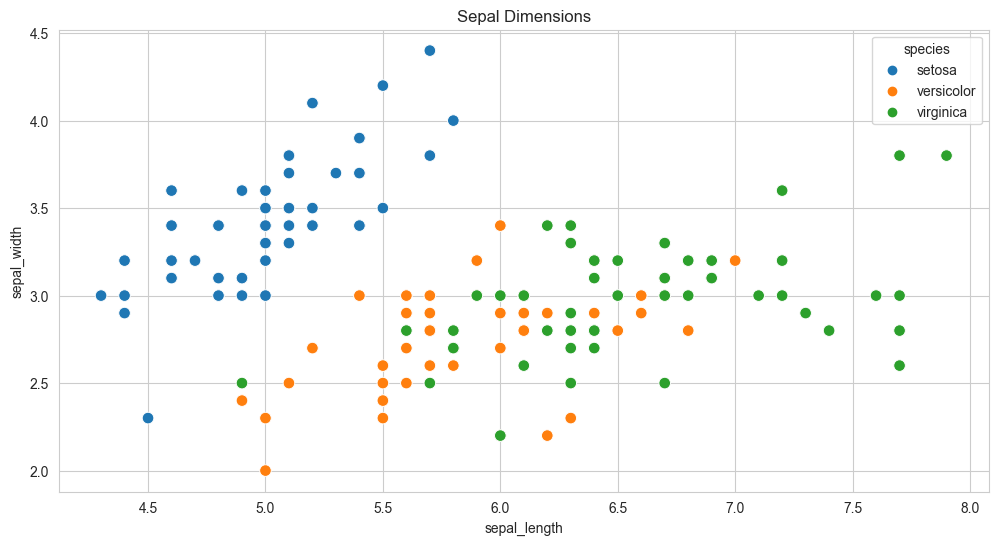

In [28]:
# scatterplot
plt.figure(figsize=(12, 6))
plt.title('Sepal Dimensions')
sns.scatterplot(x=flowers_df.sepal_length, y=flowers_df.sepal_width, hue=flowers_df.species, s=70)

<Axes: title={'center': 'Sepal Lengths'}, xlabel='species', ylabel='sepal_length'>

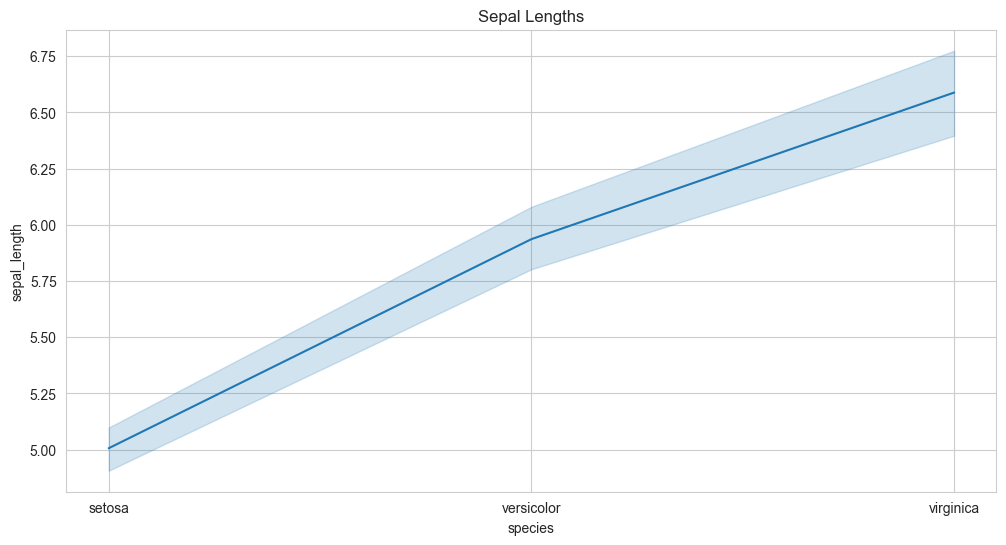

In [29]:
# lineplot
plt.figure(figsize=(12, 6))
plt.title('Sepal Lengths')
sns.lineplot(x=flowers_df.species, y=flowers_df.sepal_length)

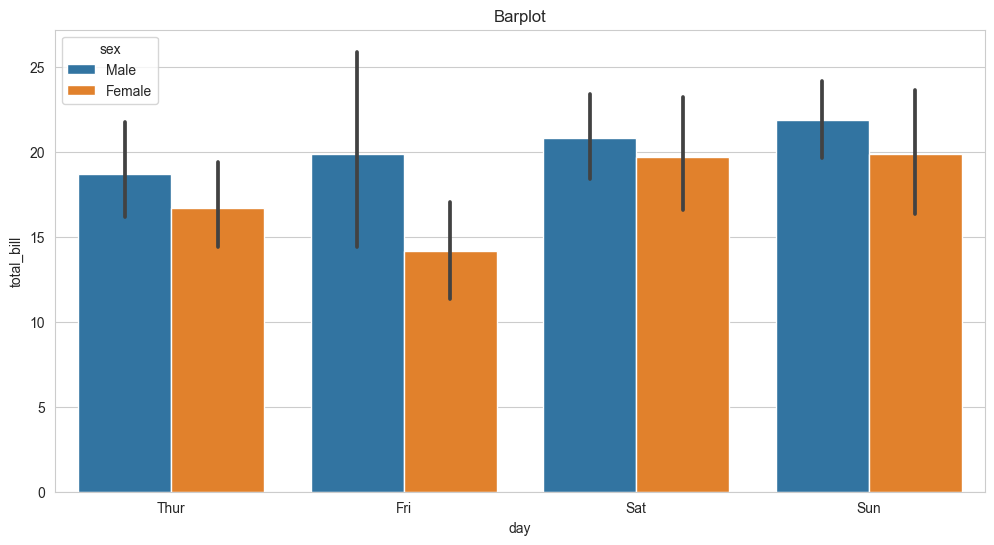

In [30]:
# barplot
plt.figure(figsize=(12, 6))
plt.title('Barplot')
sns.barplot(x='day', y='total_bill', hue='sex', data=tips_df)
plt.show()

<Axes: title={'center': 'No of Passengers (1000s)'}, xlabel='year', ylabel='month'>

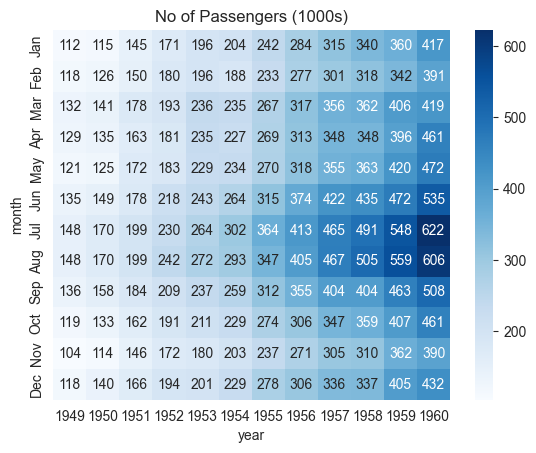

In [31]:
# heatmap
plt.title('No of Passengers (1000s)')
sns.heatmap(flights_df, fmt='d', annot=True, cmap='Blues')

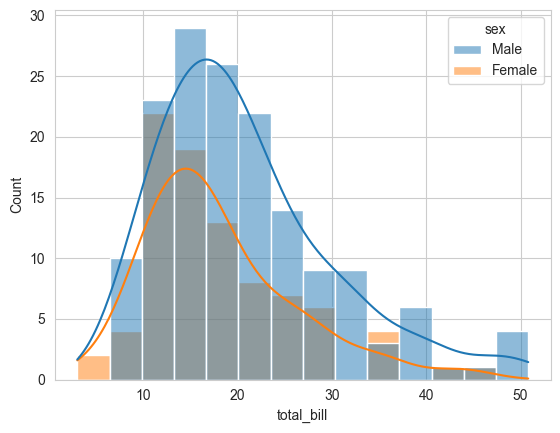

In [32]:
# histplot
sns.histplot(x='total_bill', data=tips_df, kde=True, hue='sex')
plt.show()

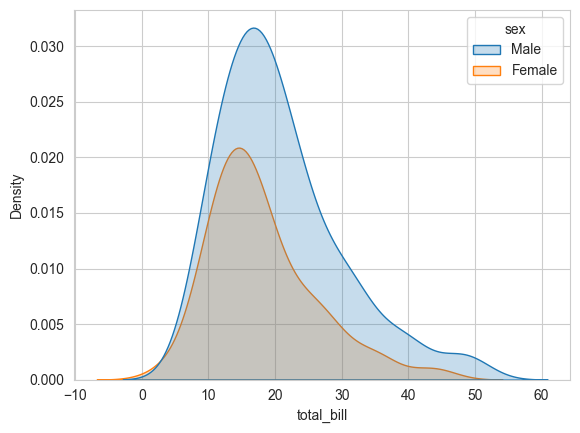

In [33]:
# kdeplot
sns.kdeplot(x='total_bill', data=tips_df, hue='sex', fill=True)
plt.show()

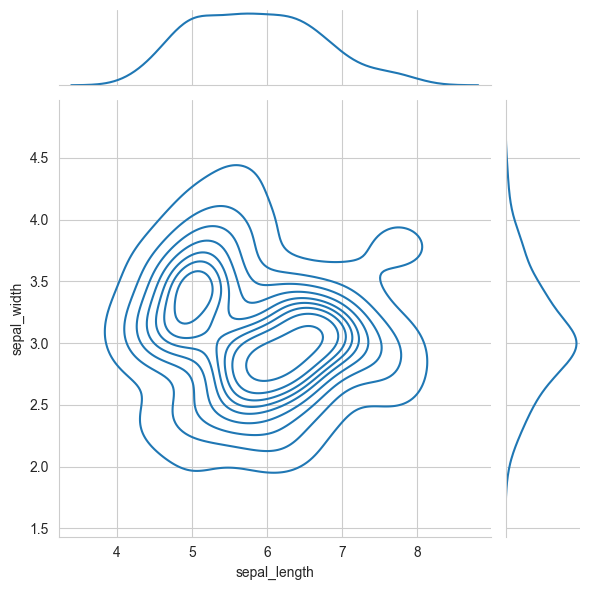

In [34]:
# jointplot
sns.jointplot(x=flowers_df.sepal_length, y=flowers_df.sepal_width, kind="kde") # Setting shade=True colors the area below the curve
plt.show()

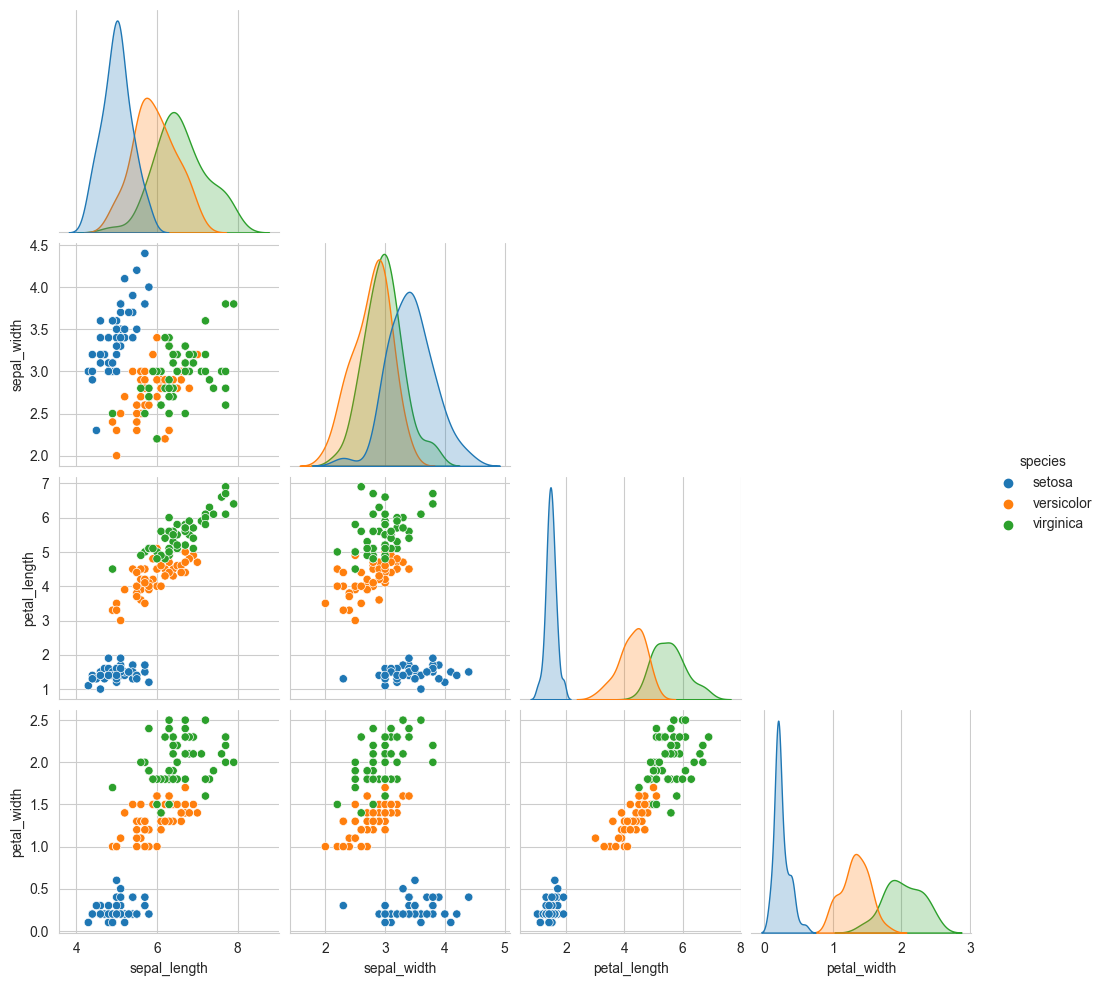

In [35]:
# pairplot
sns.pairplot(flowers_df, hue="species", corner=True)
plt.show()

In [36]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


/Users/gabriele/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


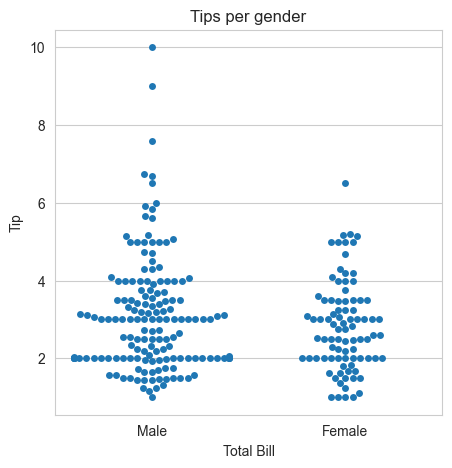

In [37]:
plt.figure(figsize=(5,5))
sns.swarmplot(x="sex",y="tip",data=tips_df)

plt.xlabel("Total Bill")
plt.ylabel("Tip")

plt.title("Tips per gender")
plt.show()

## Matplotlib

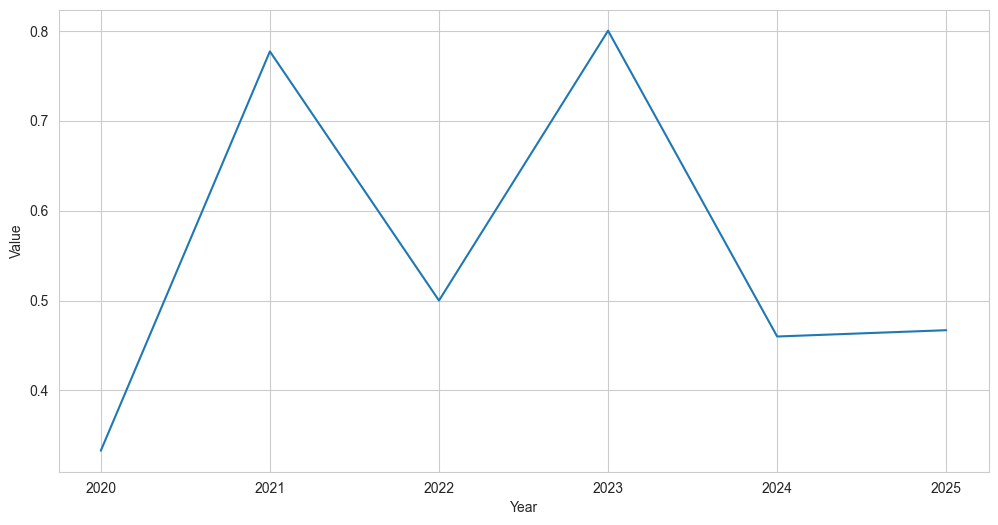

In [38]:
# single lineplot
x = range(2020, 2026)
y = [0.333, 0.777, 0.5, 0.8, 0.46, 0.467]
plt.figure(figsize = (12,6))
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

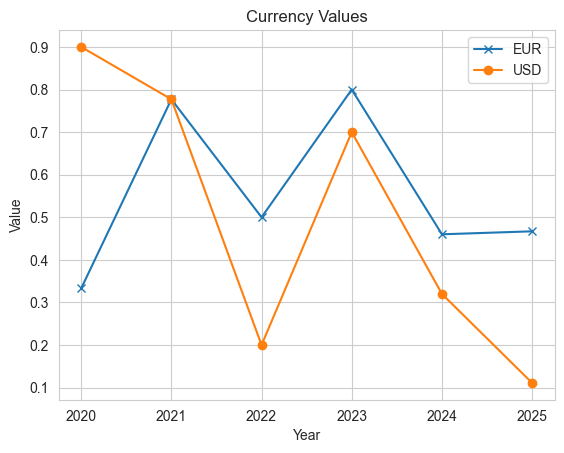

In [39]:
# multiple lineplot
eur = y
usd = [0.9, 0.777, 0.2, 0.7, 0.32, 0.111]
plt.plot(x, eur, marker='x')
plt.plot(x, usd, marker='o')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Currency Values')
plt.legend(['EUR', 'USD'])

Text(0.5, 1.0, 'Currency Values')

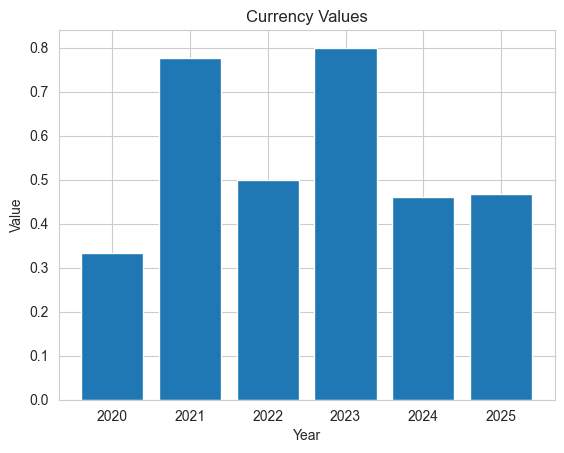

In [40]:
# single barplot
plt.bar(x, y)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Currency Values')

<BarContainer object of 6 artists>

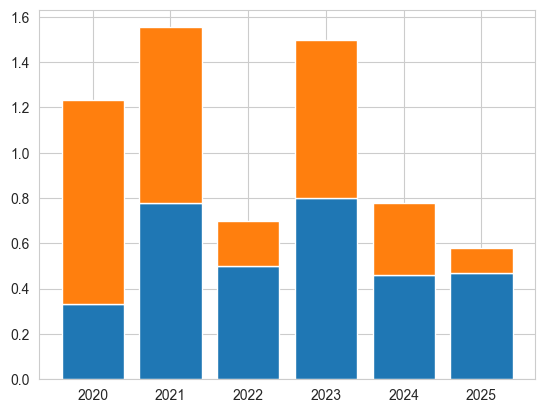

In [41]:
# multiple barplot
plt.bar(x, eur)
plt.bar(x, usd, bottom=eur)

(array([ 4.,  7., 22., 24., 50., 18., 13.,  8.,  3.,  1.,  0.]),
 array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 ,
        4.75]),
 <BarContainer object of 11 artists>)

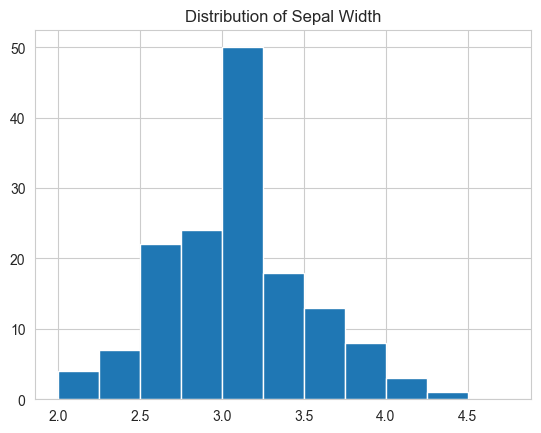

In [42]:
# single histogram
plt.title('Distribution of Sepal Width')
plt.hist(flowers_df.sepal_width, bins=np.arange(2, 5, 0.25))

(array([ 3.,  6., 12., 13., 14.,  2.,  0.,  0.,  0.,  0.,  0.]),
 array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 ,
        4.75]),
 <BarContainer object of 11 artists>)

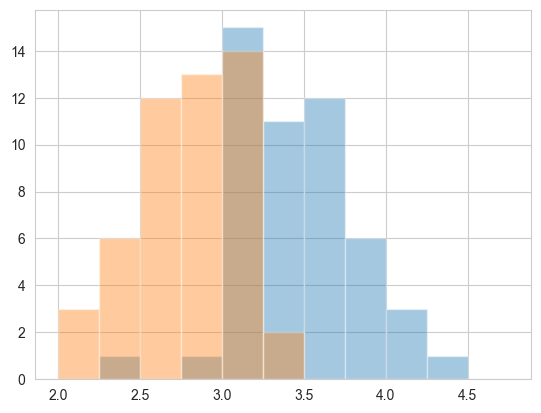

In [43]:
# overlap histogram
setosa_df = flowers_df[flowers_df.species == 'setosa']
versicolor_df = flowers_df[flowers_df.species == 'versicolor']
virginica_df = flowers_df[flowers_df.species == 'virginica']
plt.hist(setosa_df.sepal_width, alpha = 0.4, bins = np.arange(2,5,0.25))
plt.hist(versicolor_df.sepal_width, alpha = 0.4, bins = np.arange(2,5,0.25))

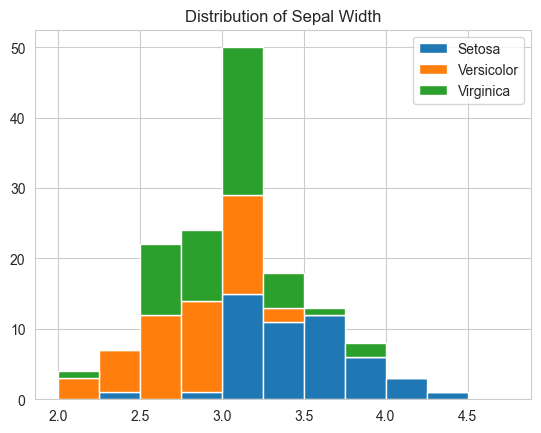

In [44]:
# stacked histogram
plt.title('Distribution of Sepal Width')
plt.hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width], bins=np.arange(2,5,0.25), stacked = True)
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

## Bokeh

In [45]:
# scatterplot
graph = figure(title = "Bokeh Scatter Graph")
color = magma(256)
graph.scatter(tips_df['total_bill'], tips_df['tip'], color=color)
show(graph) # displaying the model

In [46]:
# barplot 
graph = figure(title = "Bokeh Bar Chart")
graph.vbar(tips_df['total_bill'], top=tips_df['tip'], legend_label = "Bill VS Tips", color='green')
graph.vbar(tips_df['tip'], top=tips_df['size'], legend_label = "Tips VS Size", color='red')
graph.legend.click_policy = "hide"
show(graph) # displaying the model